In [34]:
import numpy as np
import pandas as pd
import ndtest
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math

In [35]:
all= pd.read_csv('../AllWindowData.csv')
data=pd.DataFrame(all)

In [41]:
def angle_between_vectors(v, w):
    # 计算向量内积
    dot_product = np.dot(v, w)
    
    # 计算向量的叉积
    cross_product = np.cross(v, w)
    
    # 计算向量的模
    magnitude_v = np.linalg.norm(v)
    magnitude_w = np.linalg.norm(w)
    
    # 计算夹角的余弦值
    cosine_theta = dot_product / (magnitude_v * magnitude_w)
    
    # 计算夹角的弧度
    theta_rad = np.arccos(np.clip(cosine_theta, -1.0, 1.0))
    
    # 根据叉积的方向判断夹角的正负号
    if cross_product > 0:
        theta_rad = -theta_rad
    
    # 将弧度转换为度
    theta_deg = np.degrees(theta_rad)
    
    return theta_deg

def angle_between_vectors_3d(v, w):
    # print(v, w)
    # 右正左負
    # 上正下負
    theta_horizontal_deg = angle_between_vectors(np.array([-v[0], -v[2]]), np.array([-w[0], -w[2]]))
    theta_vertical_deg = angle_between_vectors(np.array([-v[1], -v[2]]), np.array([-w[1], -w[2]]))    
    return theta_horizontal_deg, theta_vertical_deg


def getAngle(title, data):
    allpos = data[['x', 'y', 'z']]
    allrot = data[['rx', 'ry', 'rz']]
    diff_h = []
    diff_v = []
    for i in range(len(allpos)):
        h, v = angle_between_vectors_3d(np.array([allpos['x'][i], allpos['y'][i], allpos['z'][i]]), 
                                        np.array([allrot['rx'][i], allrot['ry'][i], allrot['rz'][i]]))
        diff_h.append(h)
        diff_v.append(v)
    # print(diff_h)
    # print(diff_v)
    print(f'{title}\t{np.mean(diff_h):.2f}\t{np.mean(diff_v):.2f}\tM') 
    print(f'{title}\t{np.std(diff_h):.2f}\t{np.std(diff_v):.2f}\tSTD') 


In [45]:
print('\t\t\tHorizontal\tVertical')
getAngle('All\t', data)
getAngle('All Shared Screen\t', data[data['type'] == 0].reset_index())
getAngle('All Speaker\'s Video\t', data[data['type'] == 1].reset_index())
getAngle('High-Traffic', data[data['environment'] == 'high'].reset_index())
getAngle('Low-Traffic', data[data['environment'] == 'low'].reset_index())
getAngle('Listening', data[data['Meeting type'] == 1].reset_index())
getAngle('Discussion', data[data['Meeting type'] == 2].reset_index())
getAngle('Path Anchor', data[data['windowMode'] == 0].reset_index())
getAngle('Head Anchor', data[data['windowMode'] == 1].reset_index())
getAngle('Shared Screen', data[data['type'] == 0].reset_index())
getAngle('Speaker\'s Video', data[data['type'] == 1].reset_index())

			Horizontal	Vertical
All		-3.37	5.35	M
All		9.90	11.24	STD
All Shared Screen		-0.14	5.55	M
All Shared Screen		6.85	9.57	STD
All Speaker's Video		-6.59	5.14	M
All Speaker's Video		11.33	12.69	STD
High-Traffic	-3.18	4.86	M
High-Traffic	9.93	11.40	STD
Low-Traffic	-3.55	5.83	M
Low-Traffic	9.87	11.06	STD
Listening	-4.45	4.53	M


Listening	10.70	12.24	STD
Discussion	-2.28	6.16	M
Discussion	8.89	10.08	STD
Path Anchor	-3.48	4.47	M
Path Anchor	10.66	11.46	STD
Head Anchor	-3.25	6.22	M
Head Anchor	9.08	10.95	STD
Shared Screen	-0.14	5.55	M
Shared Screen	6.85	9.57	STD
Speaker's Video	-6.59	5.14	M
Speaker's Video	11.33	12.69	STD


In [30]:
data=pd.DataFrame({'id':all["userId"],"case":all['caseNum'], 'Window Type':all['type'],'Environment': all[ "environment"],'Distance':all["distance"],'Window Anchor':all['windowMode'],'Transparency':all['transparency'],'Size':all['visual angle'],'Meeting Format':all['Meeting type'], 'theta':all['theta'], 'phi':all['phi'], 'Offset':all['offset'], 'x': all['x'], 'y': all['y'], 'z': all['z'], 'scale': all['scale']})
data['Window Type'] = data['Window Type'].replace({0: 'Shared Screen', 1: 'Speaker\'s Video'})
data['Window Anchor'] = data['Window Anchor'].replace({0: 'Path Anchor', 1: 'Head Anchor'})
data['Meeting Format'] = data['Meeting Format'].replace({1: 'Listening', 2: 'Discussion'})
data['Environment'] = data['Environment'].replace({'low': 'Low-Traffic', 'high': 'High-Traffic'})
data['Transparency']=1-data['Transparency']

In [31]:
def get_k2d(data, para):
    grouped = data.groupby([para, 'Window Type']).apply(lambda x: x[['id', 'case', para, 'Window Type','theta', 'phi']])
    # print(grouped)
    for w in grouped['Window Type'].unique():
        p = grouped[para].unique()        
        a = grouped[(grouped['Window Type']==w) & (grouped[para]==p[0])]
        b = grouped[(grouped['Window Type']==w) & (grouped[para]==p[1])]
        p_value = ndtest.ks2d2s(np.array(a['theta'].tolist()), np.array(a['phi'].tolist()),
                                np.array(b['theta'].tolist()), np.array(b['phi'].tolist()))
        print(para,"\t", w,"\t", p_value)
        

def scatter(data, para, value):
    grouped = data.groupby([para, 'Window Type']).apply(lambda x: x[['id', 'case', para, 'Window Type','theta', 'phi']])
    p = grouped[para].unique()        
    a = grouped[(grouped['Window Type']==value) & (grouped[para]==p[0])]
    b = grouped[(grouped['Window Type']==value) & (grouped[para]==p[1])]
    # b.sort_values(by='Size', ascending=False)
    print(b.sort_values(by='phi', ascending=False))
    plt.scatter(a['theta'].tolist(), a['phi'].tolist(), color="red", label=f'{p[0]}')
    plt.scatter(b['theta'].tolist(), b['phi'].tolist(), color="green", label=f'{p[1]}')
    plt.scatter(1.57, 1.57, marker='*', color='#00264a', s=210, label='Center Eye', ) 
    plt.plot([36*math.pi/180, 144*math.pi/180], [42*math.pi/180, 42*math.pi/180], color='blue', linestyle='--',label='FOV')
    plt.plot([36*math.pi/180, 144*math.pi/180], [138*math.pi/180, 138*math.pi/180], color='blue', linestyle='--')
    plt.plot([36*math.pi/180, 36*math.pi/180], [42*math.pi/180, 138*math.pi/180], color='blue', linestyle='--')
    plt.plot([144*math.pi/180, 144*math.pi/180], [42*math.pi/180, 138*math.pi/180], color='blue', linestyle='--')
    # rect = matplotlib.patches.Rectangle((139, 147), 38, 21, linewidth=1, edgecolor='r', linestyle='dashed', facecolor='none')
    # plt.add_patch(rect)
    plt.title(f"Positions of {value}\nbetween {para}", fontsize=20)
    plt.xlabel("Theta", fontsize=15)
    plt.ylabel("Phi", fontsize=15)
    plt.xlim(-90,90)
    plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
    plt.ylim(-90,90)
    plt.legend(fontsize=10)
    plt.show()

In [32]:
get_k2d(data, 'Environment')
get_k2d(data, 'Meeting Format')
get_k2d(data, 'Window Anchor')

Environment 	 Speaker's Video 	 0.27810877945961593
Environment 	 Shared Screen 	 0.1413661693057938
Meeting Format 	 Speaker's Video 	 0.37271194062565255
Meeting Format 	 Shared Screen 	 0.4903540933667076
Window Anchor 	 Speaker's Video 	 0.3235927634969389
Window Anchor 	 Shared Screen 	 0.06442729455628673


     id  case   Environment    Window Type      theta        phi
221  14     4  High-Traffic  Shared Screen -18.233834  42.297888
217  14     3  High-Traffic  Shared Screen  26.374103  33.159912
93    6     4  High-Traffic  Shared Screen   6.169116  22.714778
95    6     4  High-Traffic  Shared Screen   6.169116  22.714778
157  10     4  High-Traffic  Shared Screen   6.254466  21.902734
..   ..   ...           ...            ...        ...        ...
121   8     3  High-Traffic  Shared Screen  -3.327634 -35.920946
79    5     4  High-Traffic  Shared Screen  -0.570403 -36.715517
77    5     4  High-Traffic  Shared Screen  -0.570403 -36.715517
123   8     3  High-Traffic  Shared Screen  -4.419444 -41.555991
125   8     4  High-Traffic  Shared Screen   3.332307 -47.273911

[64 rows x 6 columns]


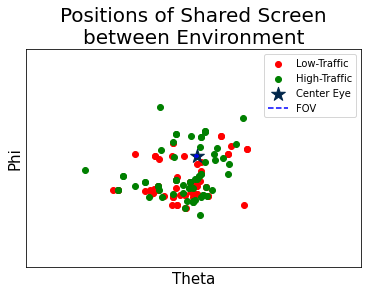

     id  case   Environment      Window Type      theta        phi
156  10     4  High-Traffic  Speaker's Video -47.248729  27.982781
216  14     3  High-Traffic  Speaker's Video -10.664701  24.414808
188  12     4  High-Traffic  Speaker's Video   6.542734  15.164682
92    6     4  High-Traffic  Speaker's Video   5.814914  14.921971
94    6     4  High-Traffic  Speaker's Video   5.814914  14.921971
..   ..   ...           ...              ...        ...        ...
14    1     4  High-Traffic  Speaker's Video  -2.096729 -34.632815
10    1     3  High-Traffic  Speaker's Video  -2.096729 -34.632815
220  14     4  High-Traffic  Speaker's Video  17.629270 -35.134247
30    2     4  High-Traffic  Speaker's Video   5.937640 -35.807585
222  14     4  High-Traffic  Speaker's Video -20.934551 -37.965215

[64 rows x 6 columns]


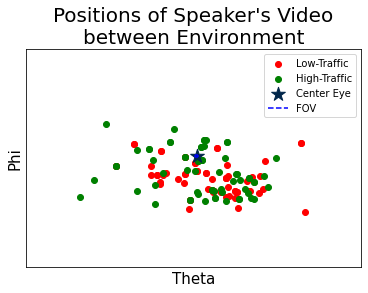

In [33]:
scatter(data, 'Environment', 'Shared Screen')
scatter(data, 'Environment', 'Speaker\'s Video')
# scatter(data, 'Meeting Format', 'Shared Screen')
# scatter(data, 'Meeting Format', 'Speaker\'s Video')
# scatter(data, 'Window Anchor', 'Shared Screen')
# scatter(data, 'Window Anchor', 'Speaker\'s Video')